In [2]:
#importing the very basic libraries

import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

In [3]:
#importing our dataset

data = pd.read_csv('medical_cost_insurance.csv')
data.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


### Figuring our data

In [4]:
print(data.shape)

(1338, 7)


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
data.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
for col in data.columns:
    print(data[col].value_counts())
    print('\n\n')

18    69
19    68
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
22    28
49    28
54    28
53    28
21    28
26    28
24    28
25    28
28    28
27    28
23    28
43    27
29    27
30    27
41    27
42    27
44    27
31    27
40    27
32    26
33    26
56    26
34    26
55    26
57    26
37    25
59    25
58    25
36    25
38    25
35    25
39    25
61    23
60    23
63    23
62    23
64    22
Name: age, dtype: int64



male      676
female    662
Name: sex, dtype: int64



32.300    13
28.310     9
30.495     8
30.875     8
31.350     8
          ..
46.200     1
23.800     1
44.770     1
32.120     1
30.970     1
Name: bmi, Length: 548, dtype: int64



0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64



no     1064
yes     274
Name: smoker, dtype: int64



southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64



1639.56310     2
16884.92400    1
29330.98315    1
2221.56445     1
19798.

### we can see some of our features are in object datatype which we will convert using Encoders 

In [8]:
#since we don't want our fearures to be encoded in a particualar order we will use Label Encoder
from sklearn.preprocessing import LabelEncoder
label_enco = LabelEncoder()

In [9]:
col_encoded_sex = label_enco.fit_transform(data['sex'])
data.sex = col_encoded_sex

In [10]:
col_encoded_smoker = label_enco.fit_transform(data['smoker'])
data.smoker = col_encoded_smoker

In [11]:
col_encoded_region = label_enco.fit_transform(data['region'])
data.region = col_encoded_region

In [12]:
col_encoded_sex

array([0, 1, 1, ..., 0, 0, 0])

In [13]:
col_encoded_smoker

array([1, 0, 0, ..., 0, 0, 1])

In [14]:
col_encoded_region

array([3, 2, 2, ..., 2, 3, 1])

In [15]:
print(data.shape)
print('\n')
print(data.info())

(1338, 7)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int32  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int32  
 5   region    1338 non-null   int32  
 6   charges   1338 non-null   float64
dtypes: float64(2), int32(3), int64(2)
memory usage: 57.6 KB
None


In [16]:
data.sample(15)

,age,sex,bmi,children,smoker,region,charges
197,45,0,28.600,2,0,2,8516.82900
1003,48,1,29.600,0,0,3,21232.18226
1061,57,1,27.940,1,0,2,11554.22360
934,32,1,37.180,2,0,2,4673.39220
103,61,0,29.920,3,1,2,30942.19180
1241,64,1,36.960,2,1,2,49577.66240
1330,57,0,25.740,2,0,2,12629.16560
996,39,0,34.100,3,0,3,7418.52200
152,32,0,37.145,3,0,0,6334.34355
1236,63,0,21.660,0,0,0,14449.85440


our columns are correctly converted

### Now let's check the distribution of our data

In [17]:
data.describe()
#we are only considering contineous features i.e., age, bmi 

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.515695,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


we can see for contineous features (age and bmi) the difference between mean and std is not much which may cause some issue. So we will check for ourliers with box plot

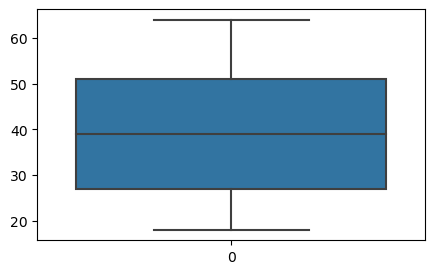

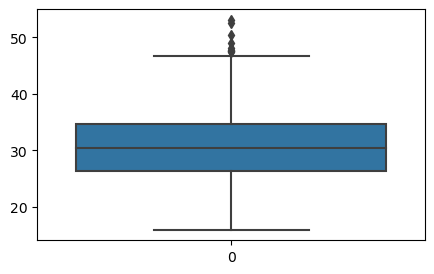

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

for i in ['age','bmi']:
    plt.figure(figsize=(5,3))
    sns.boxplot(data[i])
    plt.show()

In [19]:
# we can see that there are outliers in bmi feature
# while describing our features the max value is 53 which is very high.
# These are the BMI categories

# Underweight = <18.5
# Normal weight = 18.5–24.9 
# Overweight = 25–29.9 
# Obesity = BMI of 30 or greater 

#### We will remove outliers using the iqr method

In [20]:
q1 = data.quantile(0.25)
q3 = data.quantile(0.75)
iqr = q3-q1
iqr
#we only need bmi

age            24.000000
sex             1.000000
bmi             8.397500
children        2.000000
smoker          0.000000
region          1.000000
charges     11899.625365
dtype: float64

In [21]:
#the outliers are on upper side hecne we need to remove ourliers from upper side only

In [22]:
bmi_upper_range = q3.bmi + (1.5*iqr.bmi)
bmi_upper_range

47.290000000000006

In [23]:
index_bmi_upper = np.where(data.bmi>bmi_upper_range)
index_bmi_upper
#We can remove them without losing much data

(array([ 116,  286,  401,  543,  847,  860, 1047, 1088, 1317], dtype=int64),)

In [24]:
data = data.drop(data.index[index_bmi_upper])
data.reset_index()
data.shape

(1329, 7)

In [25]:
data.describe()
#we are only considering contineous features i.e., age, bmi 

,age,sex,bmi,children,smoker,region,charges
count,1329.000000,1329.000000,1329.000000,1329.000000,1329.000000,1329.000000,1329.000000
mean,39.203913,0.504138,30.537348,1.096313,0.203913,1.513168,13212.333374
std,14.047835,0.500171,5.919946,1.207928,0.403057,1.106532,11997.236429
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.220000,0.000000,0.000000,1.000000,4738.268200
50%,39.000000,1.000000,30.300000,1.000000,0.000000,2.000000,9361.326800
75%,51.000000,1.000000,34.485000,2.000000,0.000000,2.000000,16586.497710
max,64.000000,1.000000,46.750000,5.000000,1.000000,3.000000,62592.873090


### Observations from each contineous feature
- min age is 18 and max is 64. It is correct
- min bmi is 15.9 i.e, 16 which is underweight and max is 46. It also seems correct

In [26]:
# since we have corrected our data lets plot distribution plot to visualize our data

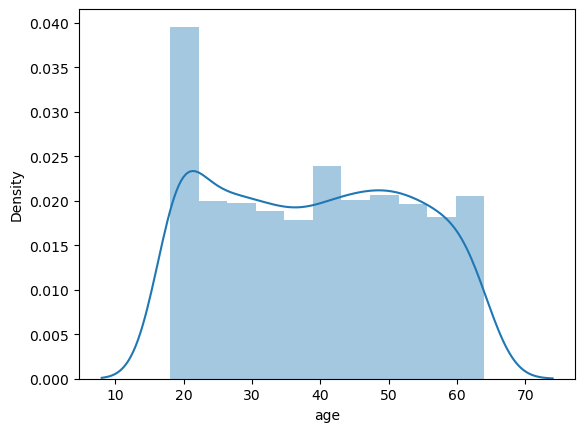

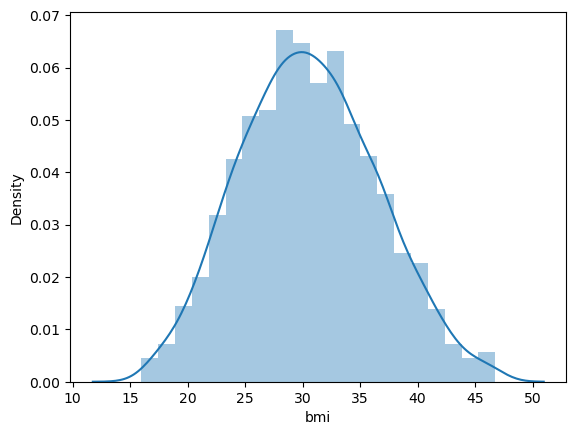

In [27]:
for col in ['age', 'bmi']:
    sns.distplot(data[col])
    plt.xlabel(col)
    plt.show()

#### The distributon seems good to proceed further

## Now lets find relationship b/w feature and label

In [28]:
x = data.drop(columns='charges')
y = data.charges

In [29]:
x

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1
1334,18,0,31.920,0,0,0
1335,18,0,36.850,0,0,2
1336,21,0,25.800,0,0,3


In [30]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1329, dtype: float64

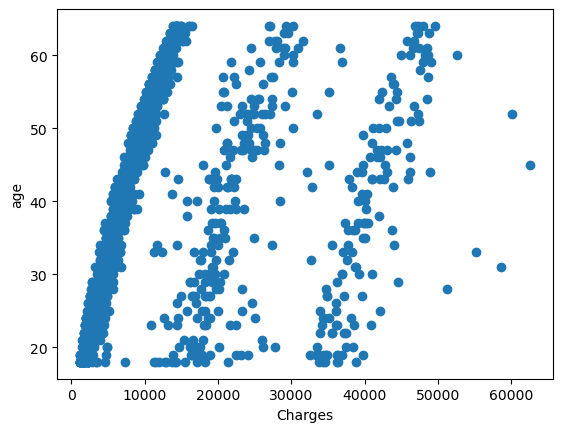

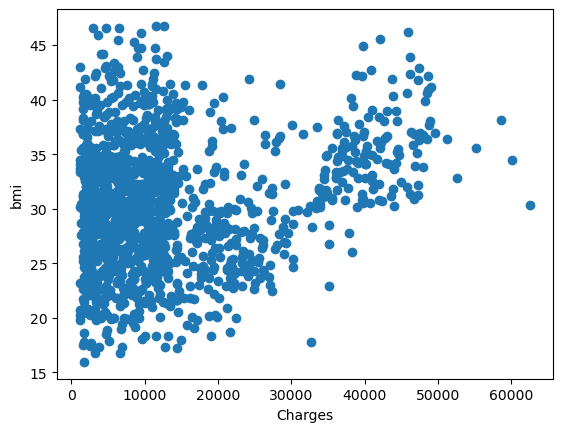

In [31]:
# plotting scatter plot to find relation between contineous features and label
for col in ['age', 'bmi']:
    plt.scatter(y,x[col])
    plt.ylabel(col)
    plt.xlabel('Charges')
    plt.show()

In [32]:
# we can somewhat see a positive correlation

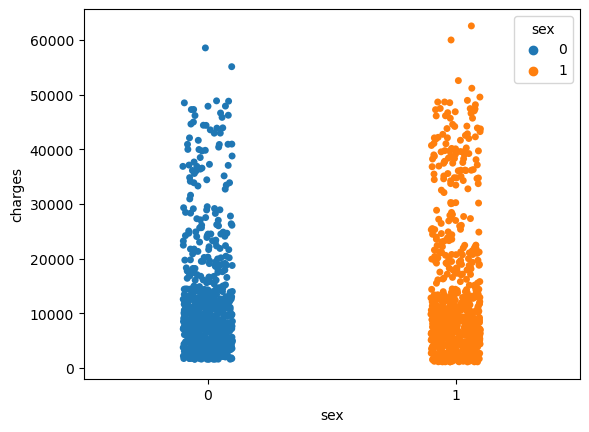

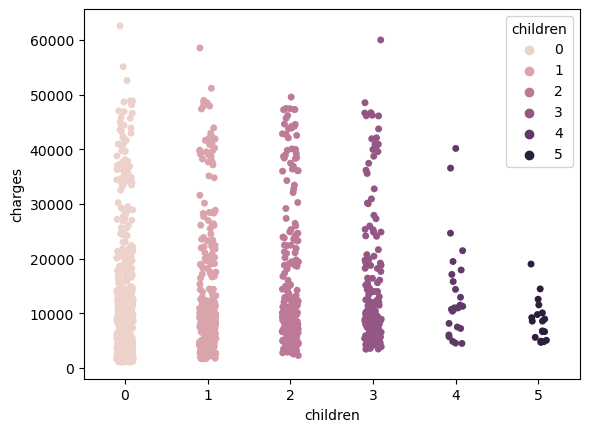

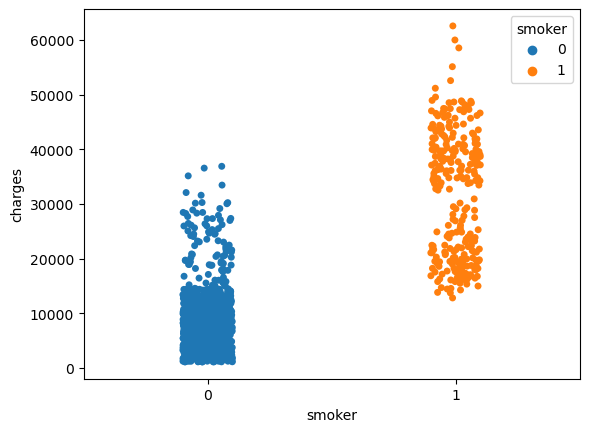

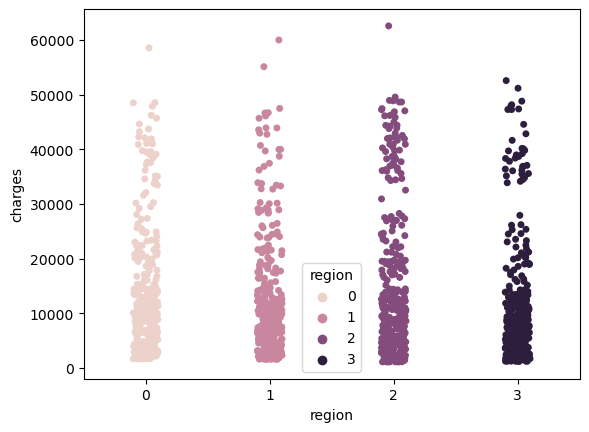

In [33]:
# plotting strip plot to find relation between contineous features and label
for col in ['sex','children','smoker','region']:
    sns.stripplot(x=x[col],y=y,hue=x[col])
    plt.show()

### We can see relations and observer that sex and region are not affecting the charges. Only childern and sex are affecting the charges.

In [34]:
# lets plot a heat map to visualize correlation and multicolieartity

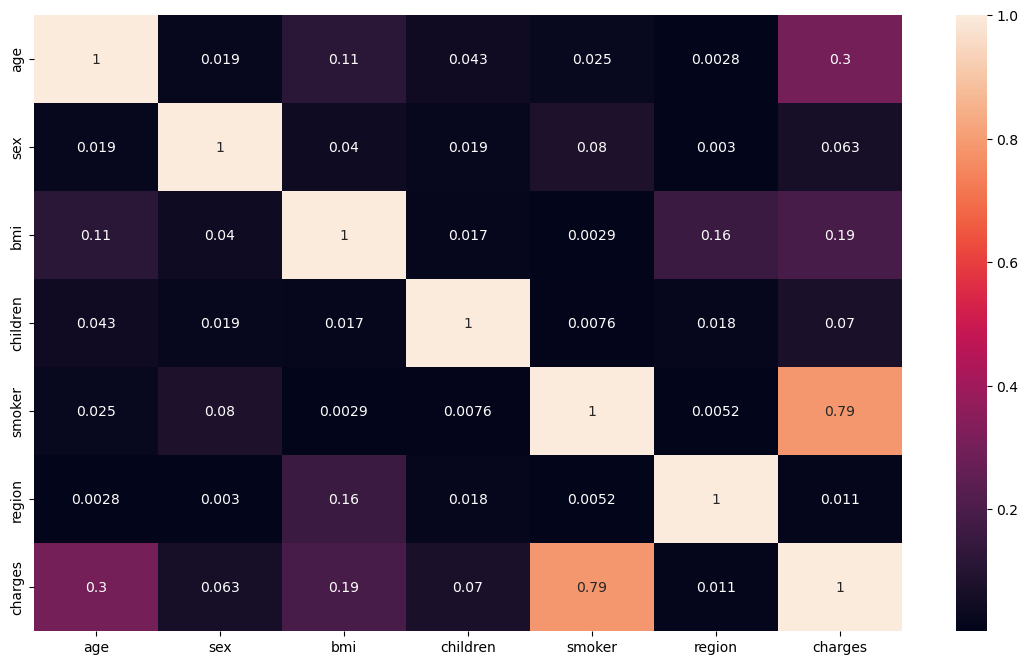

In [35]:
data_coef = data.corr().abs()
plt.figure(figsize=(14,8))
sns.heatmap(data_coef, annot=True, annot_kws={'size':10})
plt.show()


- Hence through heat map we can confirm that smoker and charges are correlated and region is not related to charges and through strip plot we have confirmed that childern and charges are correlated. Therefore we can drop region feature
- Also we can see no multicollinearity between features

In [36]:
data = data.drop(columns='region')
data

,age,sex,bmi,children,smoker,charges
0,19,0,27.900,0,1,16884.92400
1,18,1,33.770,1,0,1725.55230
2,28,1,33.000,3,0,4449.46200
3,33,1,22.705,0,0,21984.47061
4,32,1,28.880,0,0,3866.85520
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,10600.54830
1334,18,0,31.920,0,0,2205.98080
1335,18,0,36.850,0,0,1629.83350
1336,21,0,25.800,0,0,2007.94500


In [37]:
# seperatin features and label
x_feature = data.drop(columns='charges')
y_label = data.charges

## Lets standardize our features

In [38]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

feature_standardized = scaler.fit_transform(x_feature)
feature_standardized

array([[-1.43876391, -1.00831144, -0.44566964, -0.90793956,  1.97586919],
       [-1.50997605,  0.99175707,  0.54626664, -0.07976408, -0.50610638],
       [-0.79785463,  0.99175707,  0.41614893,  1.57658687, -0.50610638],
       ...,
       [-1.50997605, -1.00831144,  1.06673747, -0.90793956, -0.50610638],
       [-1.29633963, -1.00831144, -0.80053612, -0.90793956, -0.50610638],
       [ 1.55214607, -1.00831144, -0.24795832, -0.90793956,  1.97586919]])

## Lets split our data into training and testing data

In [39]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(feature_standardized,y_label,test_size=0.25,random_state=4)

## Since this is a regression problem we will use Linear Regression model at first

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

lin_reg_mod = LinearRegression()
lin_reg_mod.fit(x_train,y_train)

LinearRegression()

#### Lets check the adjusted_r2 value for testing and training data and evaluate our model 

In [41]:
def metric_score(model_name, x_train, x_test, y_train, y_test, Train=True):
    if Train:
        train_pred_y = model_name.predict(x_train)
        r2 = r2_score(y_train,train_pred_y)
        n = len(y)
        k = x_train.shape[1]
        adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - k - 1)
        print('Adjusted r2 value for training data is '+str(adjusted_r2))
    
    elif Train==False:
        test_pred_y = model_name.predict(x_test)
        r2 = r2_score(y_test,test_pred_y)
        n = len(y)
        k = x_test.shape[1]
        adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - k - 1)
        print('Adjusted r2 value for testing data is '+str(adjusted_r2))
        

In [42]:
metric_score(lin_reg_mod, x_train, x_test, y_train, y_test, Train=True)
metric_score(lin_reg_mod, x_train, x_test, y_train, y_test, Train=False)

Adjusted r2 value for training data is 0.7447126184308586
Adjusted r2 value for testing data is 0.7505098642609755


In [43]:
# lets evaluate our model

In [44]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [45]:
#Mean absolute Error
predicted_value = lin_reg_mod.predict(x_test)
actual_value = y_test
mean_absolute_error(actual_value,predicted_value)

4446.359974627372

In [46]:
#this means our charges are off by 4414 dollars

In [47]:
#Root Mean Squared Error
predicted_value = lin_reg_mod.predict(x_test)
actual_value = y_test

np.sqrt(mean_squared_error(actual_value,predicted_value))

6413.679380248862

In [48]:
#this means our charges are off by 4414 dollars

## The Average/mean value for Charges is 13165.977 and our error rate is high. Hence we will try to improve our model using Regularization technique

- Lasso regularization
- Ridge regularization

In [49]:
from sklearn.linear_model import Ridge, Lasso, RidgeCV, LassoCV

In [50]:
# Lasso
lasscv = LassoCV(alphas = None, max_iter=15)
lasscv.fit(x_train, y_train)

LassoCV(max_iter=15)

In [51]:
alpha_learningRate = lasscv.alpha_
alpha_learningRate

8.77575573082019

In [52]:
lasso_regression = Lasso(alpha_learningRate)
lasso_regression.fit(x_train, y_train)

Lasso(alpha=8.77575573082019)

In [53]:
metric_score(lasso_regression, x_train, x_test, y_train, y_test, Train=True)
metric_score(lasso_regression, x_train, x_test, y_train, y_test, Train=False)

Adjusted r2 value for training data is 0.7447096700491109
Adjusted r2 value for testing data is 0.7505318716958792


In [54]:
#Ridge

In [55]:
ridgecv = RidgeCV(alphas = np.arange(0.001, 0.1, 0.01))
ridgecv.fit(x_train, y_train)

RidgeCV(alphas=array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091]))

In [56]:
alpha_learningRate = ridgecv.alpha_
alpha_learningRate

0.09099999999999998

In [57]:
ridge_regression = Ridge(alpha_learningRate)
ridge_regression.fit(x_train, y_train)

Ridge(alpha=0.09099999999999998)

In [58]:
metric_score(ridge_regression, x_train, x_test, y_train, y_test, Train=True)
metric_score(ridge_regression, x_train, x_test, y_train, y_test, Train=False)

Adjusted r2 value for training data is 0.7447126114120177
Adjusted r2 value for testing data is 0.7505082530908183


## For all the models; Linear Regression, Ridge and Lasso, we are getting an accuracy of 75 percent. Hence it is the best we can do for the given data